Describe:
            car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693 

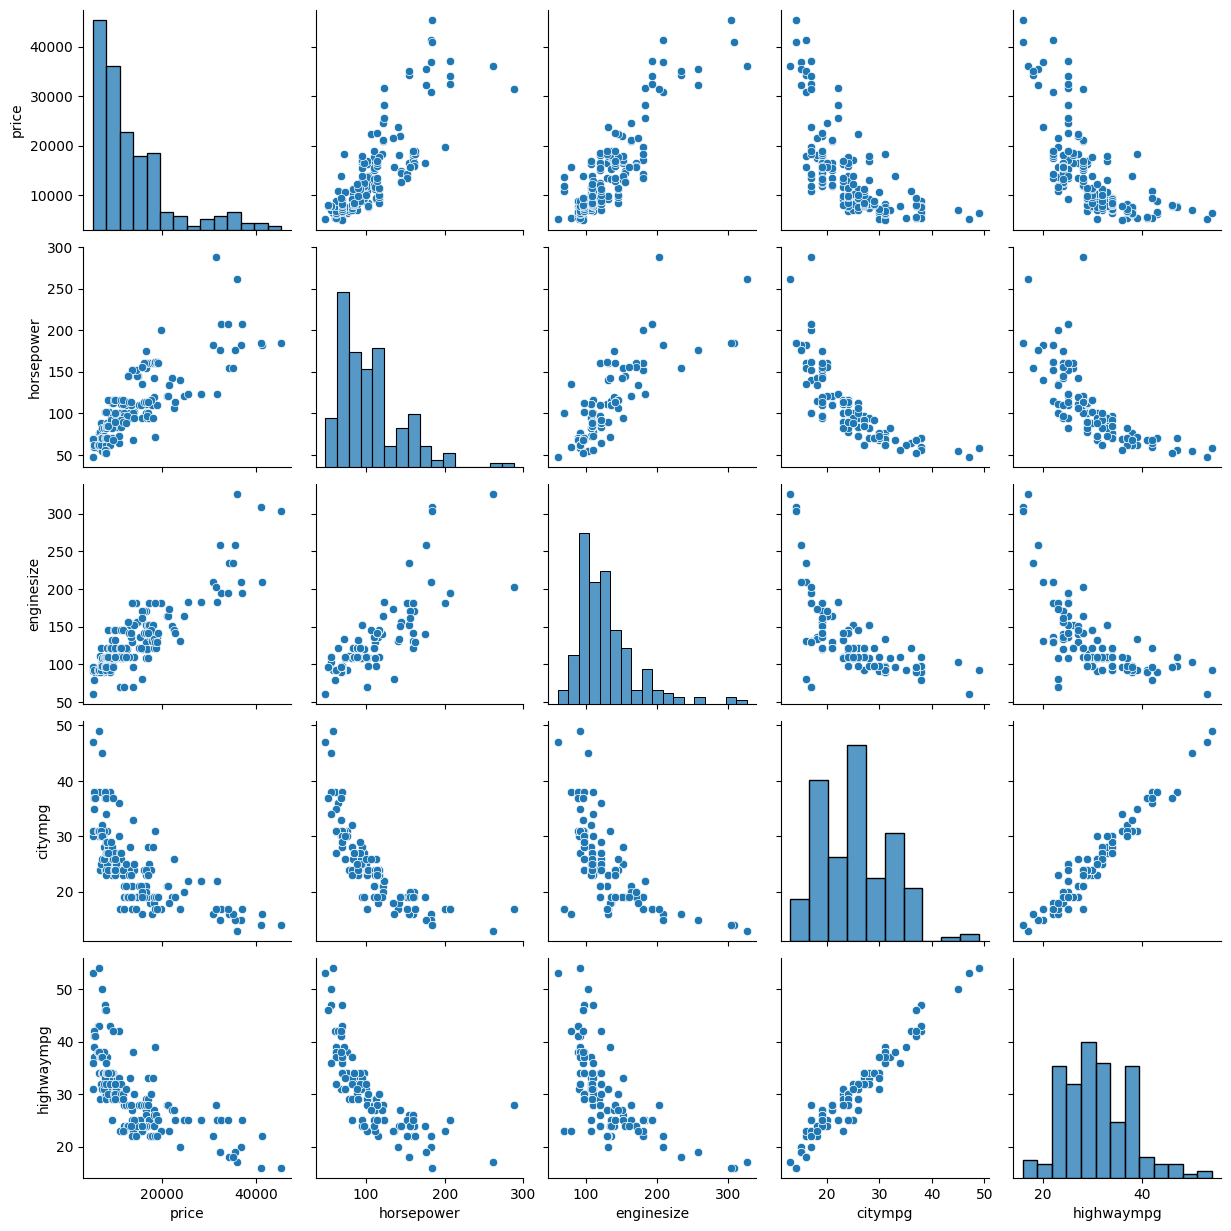

Corrs with Price:
 price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64
Train Metrics: MSE 2859218.80, RMSE 1690.92, MAE 1276.86, R2 0.9524
Test Metrics: MSE 10305271.91, RMSE 3210.18, MAE 2021.15, R2 0.8669


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


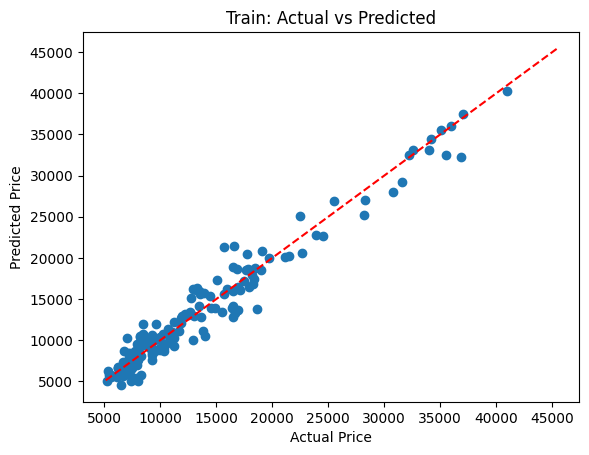

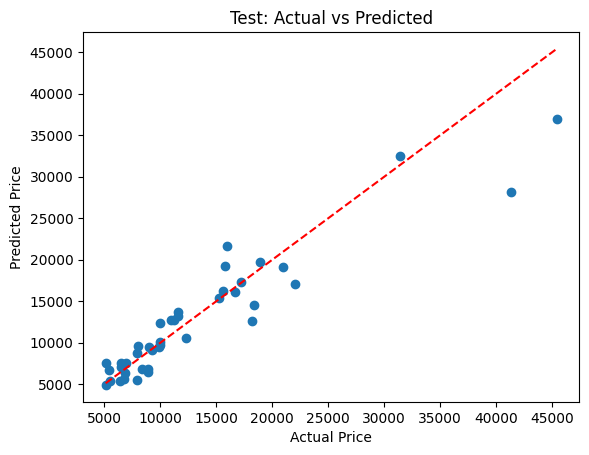

In [3]:
#TASK1

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# EDA
print('Describe:\n', df.describe())
print('Info:\n', df.info())
print('Nulls:', df.isnull().sum().sum())
print('Dups:', df.duplicated().sum())
sns.pairplot(df[['price', 'horsepower', 'enginesize', 'citympg', 'highwaympg']])
plt.show()
corr = df.select_dtypes('number').corr()['price'].sort_values(ascending=False)
print('Corrs with Price:\n', corr)

# Wrangling
X = df.drop(['price', 'car_ID', 'CarName'], axis=1)
y = df['price']
cat_cols = X.select_dtypes('object').columns
num_cols = X.select_dtypes('number').columns

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# LR Pipeline
model = Pipeline([
    ('prep', preprocessor),
    ('lr', LinearRegression())
])
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
def metrics(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{name} Metrics: MSE {mse:.2f}, RMSE {rmse:.2f}, MAE {mae:.2f}, R2 {r2:.4f}')

metrics(y_train, y_train_pred, 'Train')
metrics(y_test, y_test_pred, 'Test')

# Plots (actual vs pred)
plt.scatter(y_train, y_train_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Train: Actual vs Predicted')
plt.show()

plt.scatter(y_test, y_test_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test: Actual vs Predicted')
plt.show()

                Fan  Refrigerator  AirConditioner    Television       Monitor  \
count  45345.000000  45345.000000    45345.000000  45345.000000  45345.000000   
mean      13.990694     21.705458        1.503959     12.502635      2.865057   
std        5.470816      1.672575        1.115482      5.756007      3.894933   
min        5.000000     17.000000        0.000000      3.000000      1.000000   
25%        9.000000     22.000000        1.000000      7.000000      1.000000   
50%       14.000000     22.000000        2.000000     13.000000      1.000000   
75%       19.000000     23.000000        2.000000     17.000000      1.000000   
max       23.000000     23.000000        3.000000     22.000000     12.000000   

       MotorPump         Month  MonthlyHours    TariffRate  ElectricityBill  
count    45345.0  45345.000000  45345.000000  45345.000000     45345.000000  
mean         0.0      6.488058    515.083207      8.369648      4311.771307  
std          0.0      3.443252    12

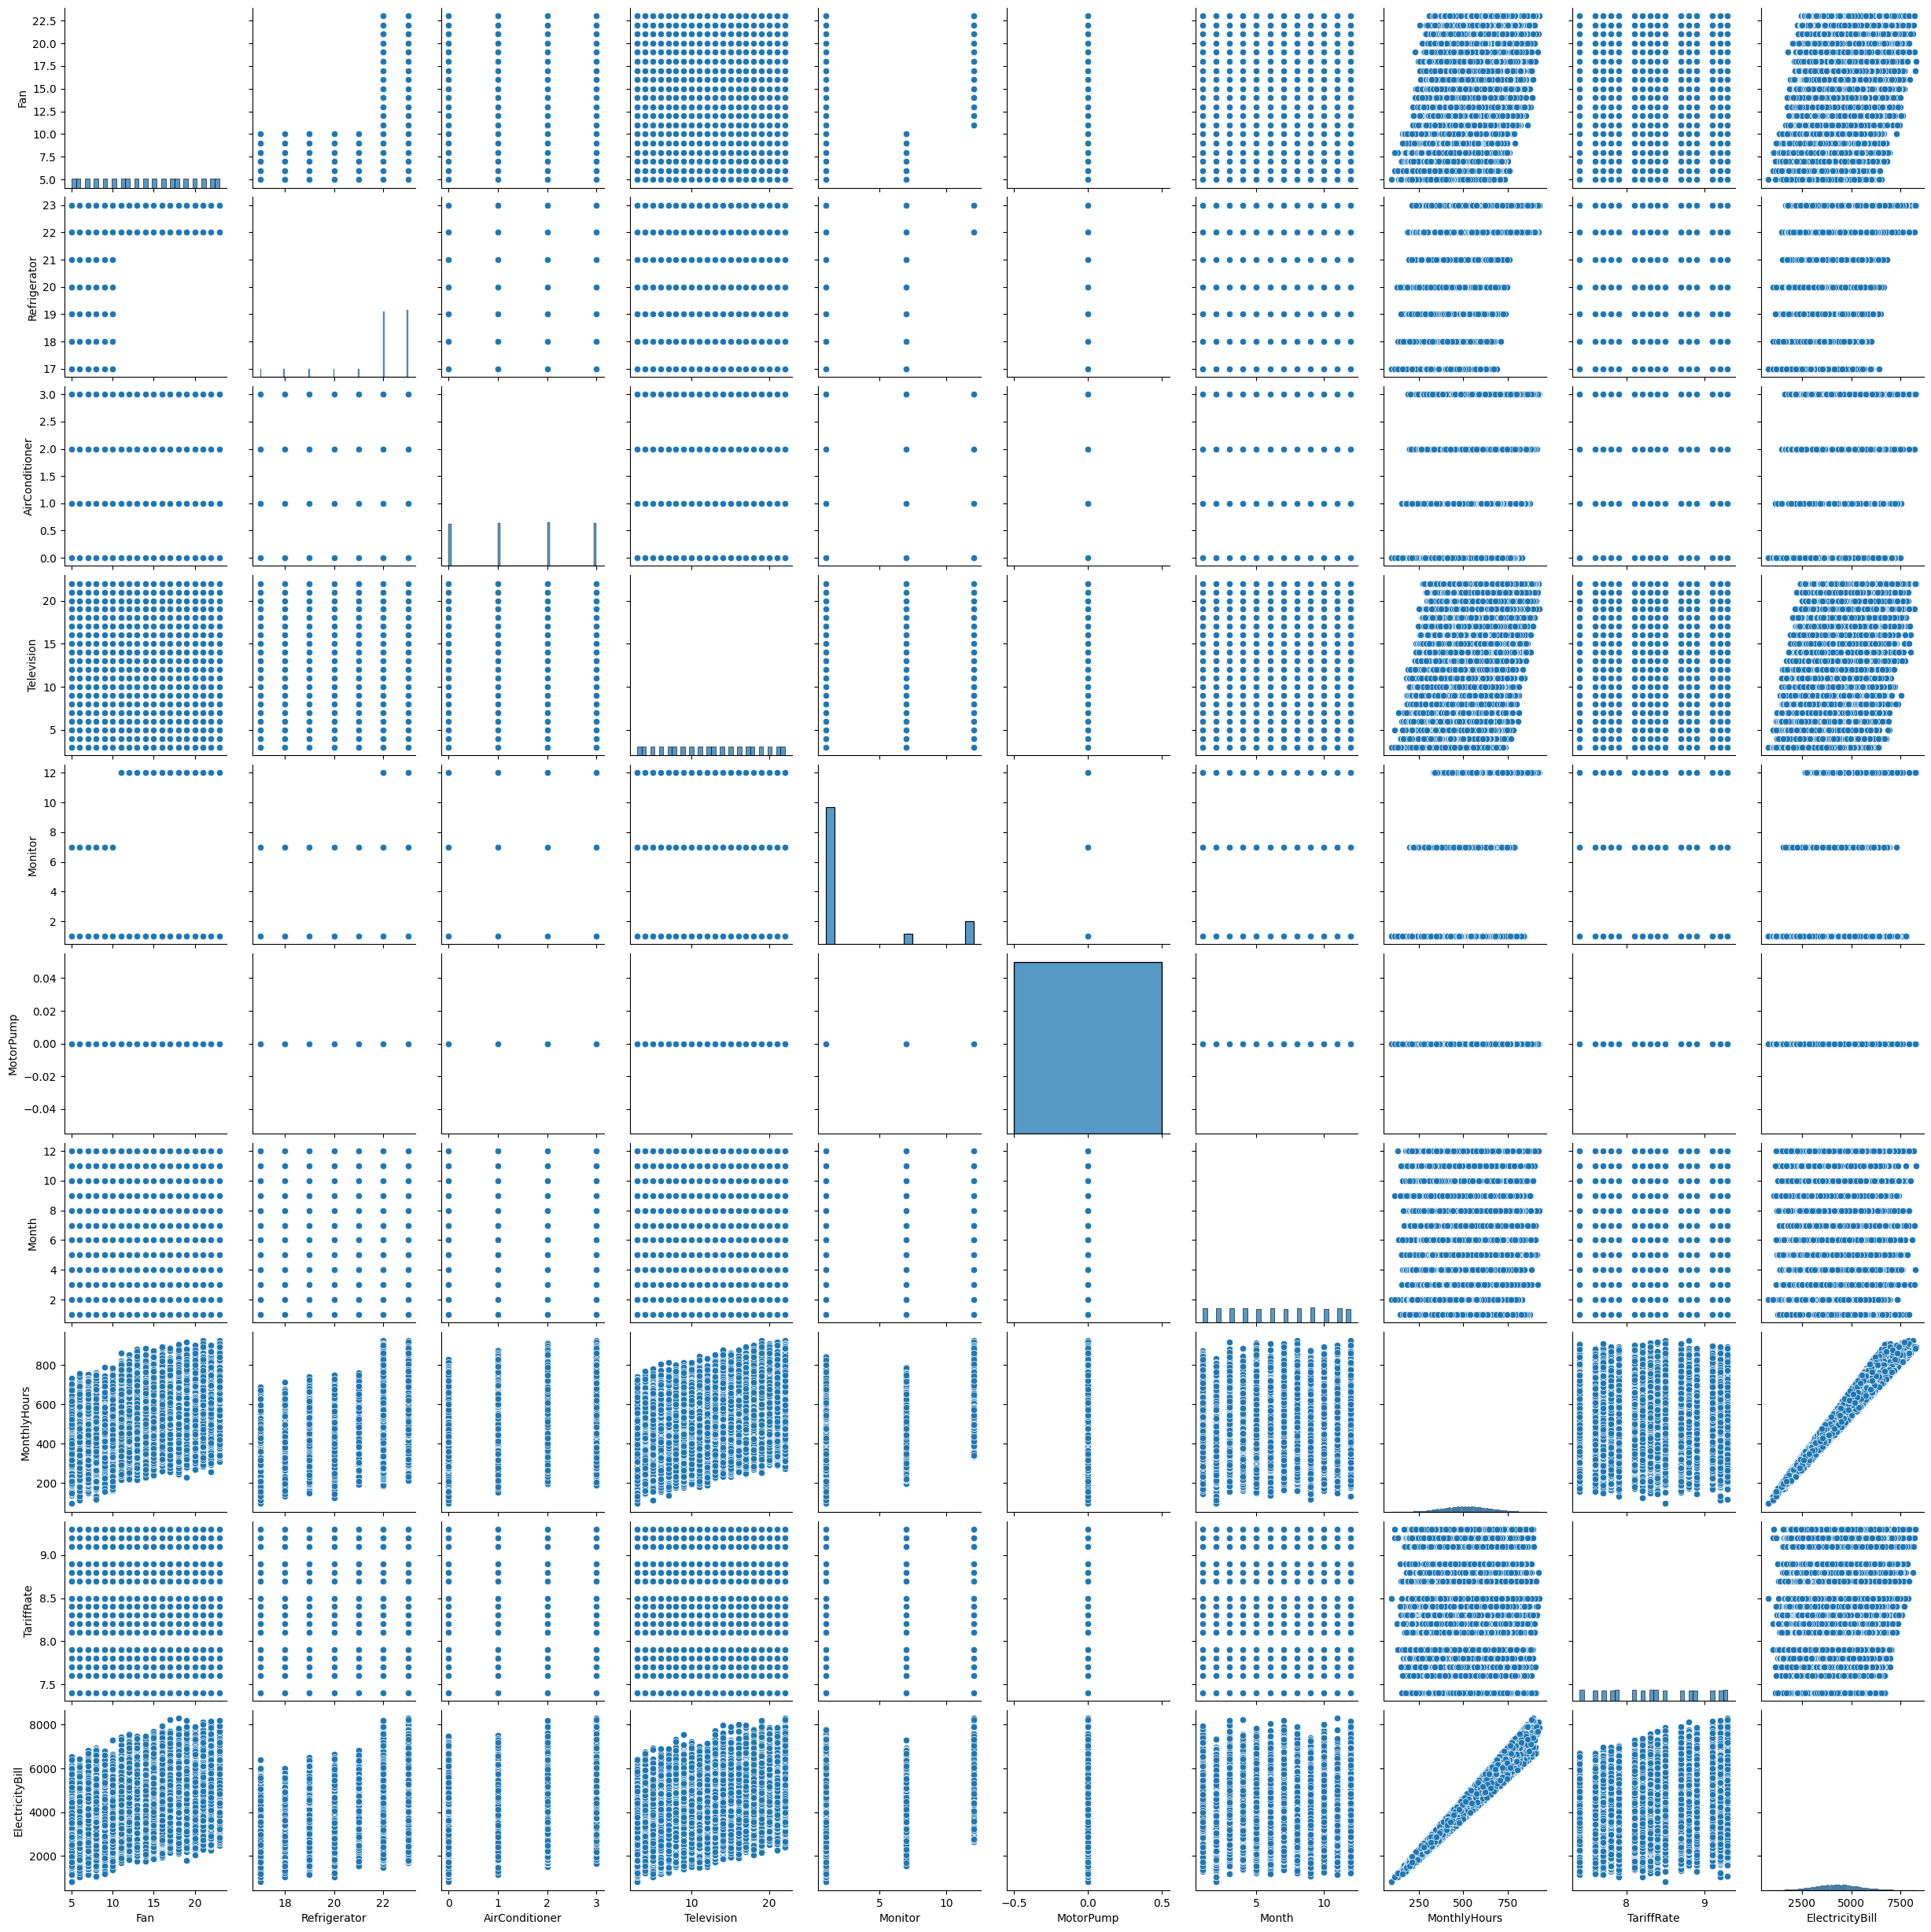

0.9956369762498173
2.000806264103556


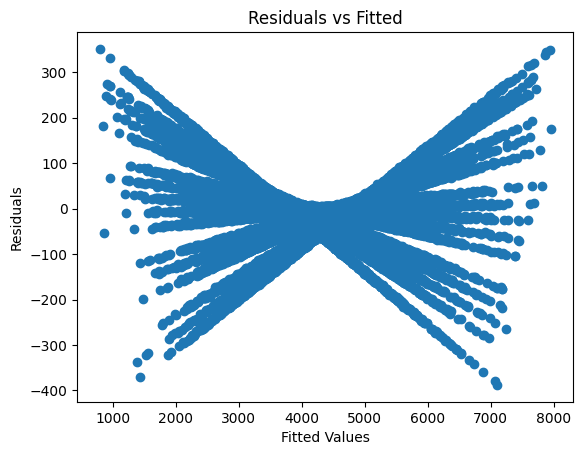

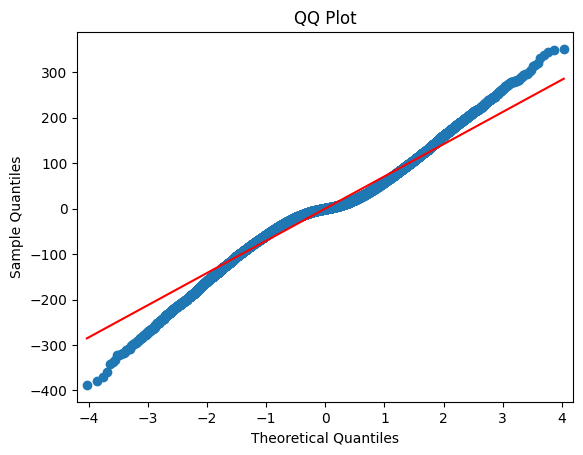

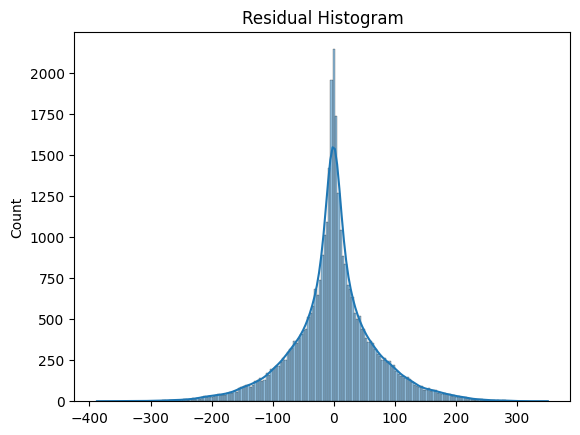

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features       VIF
0                                               const  0.000000
1                                                 Fan  1.640915
2                                        Refrigerator  1.565556
3                                      AirConditioner  1.170948
4                                          Television  1.416656
5                                             Monitor  1.192540
6                                           MotorPump       NaN
7                                               Month  1.003939
8                                        MonthlyHours  2.247056
9                                          TariffRate       inf
10                                       City_Chennai       inf
11                                         City_Dahej       inf
12                                     City_Faridabad       inf
13                                       City_Gurgaon       inf
14                                     C

In [9]:
#TASK 2

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv('electricity_bill_dataset.csv')

print(df.describe())

numeric_df = df.select_dtypes(include='number')
print(numeric_df.corr()['ElectricityBill'].sort_values(ascending=False))

sns.pairplot(numeric_df)
plt.show()

if 'City' in df.columns or 'Company' in df.columns:
    df = pd.get_dummies(df, columns=['City', 'Company'], drop_first=True)

X = df.drop('ElectricityBill', axis=1)
y = df['ElectricityBill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

X_train = X_train.astype(float)
y_train = y_train.astype(float)

X_const = sm.add_constant(X_train)
X_const = X_const.astype(float)

ols = sm.OLS(y_train.values.astype(float), X_const.values.astype(float)).fit()
resid = ols.resid

print(durbin_watson(resid))

plt.scatter(ols.fittedvalues, resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

sm.qqplot(resid, line='s')
plt.title("QQ Plot")
plt.show()

sns.histplot(resid, kde=True)
plt.title("Residual Histogram")
plt.show()

vif = pd.DataFrame()
vif["Features"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif)

# Based on the results, linear regression works reasonably well for this dataset, and most of its assumptions are met.
# The relationship between the input features and the electricity bill looks mostly linear, the residuals follow a roughly normal pattern,
# and the Durbin–Watson value of 2.00 shows that there is no autocorrelation issue.
# The residual vs. fitted graph also shows that the variance of errors stays fairly constant, which means the model is homoscedastic.

# The main issue appears in the multicollinearity check.
# Several predictors, especially TariffRate and the dummy variables created for City and Company, show extremely high or even infinite VIF values.
# This means some of the predictors are highly dependent on each other and carry overlapping information.

# Because of this, even though the model fits very well, the coefficients may not be fully reliable.
# So, linear regression can still be used, but it would be better to remove or combine some of the correlated variables,
# or use a regularization technique like Ridge or Lasso to reduce the effects of multicollinearity.
